# Change of Support: Surface to Vector

In [54]:
import rasterio
import warnings
warnings.filterwarnings('ignore')


In [55]:
from rasterio.mask import mask
import geopandas as gpd
import fiona
import pandas as pd

In [56]:
ras = 'data/stanford-td754wr4701-geotiff.tiff' # already interpolated but we will treat it as "data"

In [57]:
shp = 'data/tl_2022_06073_faces.shp'

In [58]:
gdf = gpd.read_file(shp)

In [59]:
gdf.shape

(57076, 46)

In [60]:
gdf.head()

,TFID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,BLOCKCE20,SUFFIX1CE,ZCTA5CE20,UACE20,PUMACE20,...,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON,geometry
0,216102682,06,073,016302,2,2010,None,92021,78661,07313,...,None,None,None,None,L,N,22408,+32.8008387,-116.9453919,"POLYGON ((-116.94621 32.80044, -116.94621 32.8..."
1,216102683,06,073,016302,2,2006,None,92021,78661,07313,...,None,None,None,None,L,N,29220,+32.8008392,-116.9472819,"POLYGON ((-116.94836 32.80045, -116.94836 32.8..."
2,216102684,06,073,016302,2,2007,None,92021,78661,07313,...,None,None,None,None,L,N,18605,+32.8012731,-116.9487743,"POLYGON ((-116.94919 32.80063, -116.94919 32.8..."
3,226900092,06,073,016301,2,2003,None,92020,78661,07313,...,None,None,None,None,L,N,19567,+32.7999949,-116.9608656,"POLYGON ((-116.96140 32.80088, -116.96073 32.8..."
4,263464856,06,073,016301,2,2001,None,92020,78661,07313,...,None,None,None,None,L,N,23766,+32.8019391,-116.9605314,"POLYGON ((-116.96149 32.80194, -116.96141 32.8..."


In [61]:
county = gdf.dissolve(by='COUNTYFP20')

<Axes: >

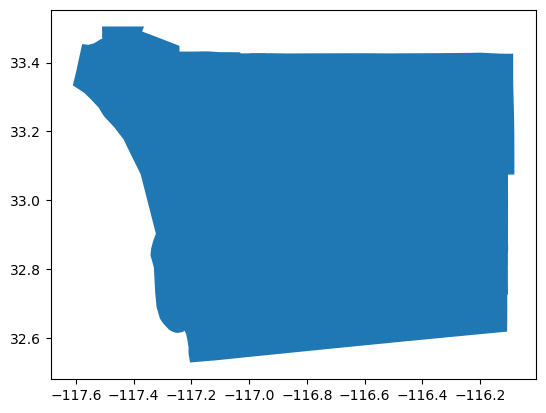

In [62]:
county.plot()

In [63]:
rast = rasterio.open(ras)

In [64]:
county = county.to_crs(rast.crs)

<Axes: >

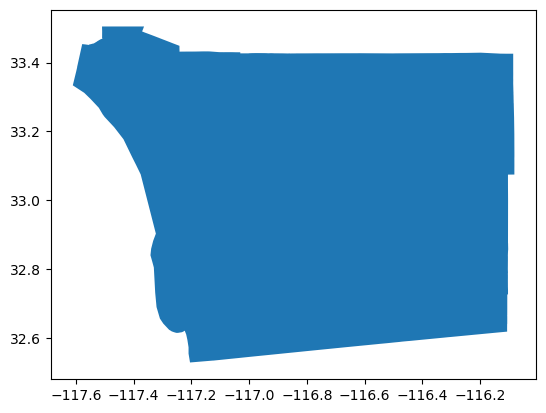

In [65]:
county.plot()

In [13]:
rast.crs

CRS.from_epsg(4326)

In [14]:
coords = gdf.geometry
src = rast
df = county
import matplotlib.pyplot as plt
from rasterio.plot import show

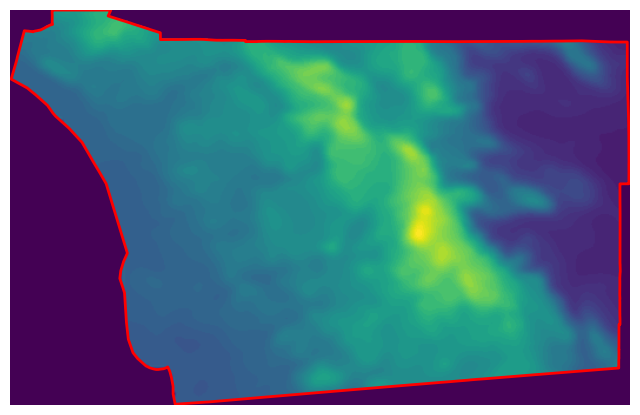

In [15]:
clipped_array, clipped_transform = mask(dataset=src, shapes=coords, crop=True)

df = df.to_crs(src.crs)
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": clipped_array.shape[1],
                 "width": clipped_array.shape[2],
                 "transform": clipped_transform})
out_tif= "clipped_example.tif"
with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(clipped_array)
    
clipped = rasterio.open(out_tif)
fig, ax = plt.subplots(figsize=(8, 6))
p1 = df.plot(color=None,facecolor='none',edgecolor='red',linewidth = 2,ax=ax)
show(clipped, ax=ax)
ax.axis('off');

In [16]:
clipped

<open DatasetReader name='clipped_example.tif' mode='r'>

In [17]:
import rioxarray

In [18]:
d = rioxarray.open_rasterio("clipped_example.tif")

In [19]:
d

<xarray.DataArray (band: 1, y: 336, x: 527)>
[177072 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -117.6 -117.6 -117.6 ... -116.1 -116.1 -116.1
  * y            (y) float64 33.5 33.5 33.5 33.5 ... 32.54 32.53 32.53 32.53
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

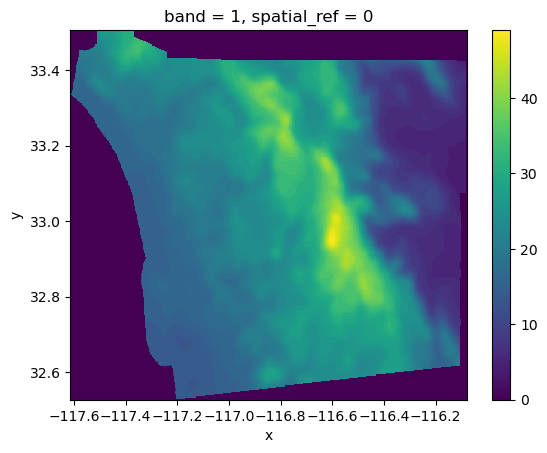

In [20]:
d.plot()

In [21]:
d.values.max()

49

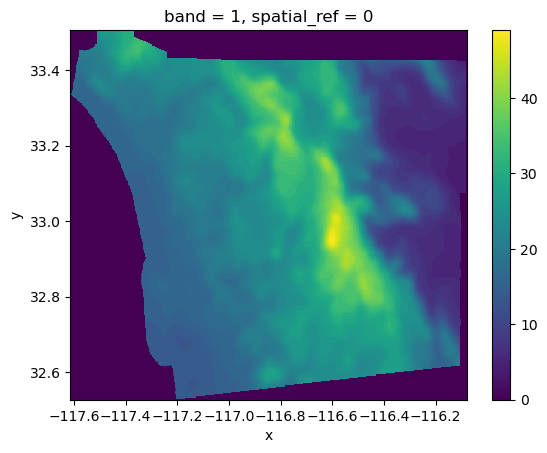

In [22]:
d.plot()

In [23]:
type(d)

xarray.core.dataarray.DataArray

In [24]:
d.dims

('band', 'y', 'x')

In [25]:
d.values.mean()

15.630963675792898

In [26]:
import numpy


In [27]:
numpy.median(d.values)

17.0

In [28]:
d.values.shape

(1, 336, 527)

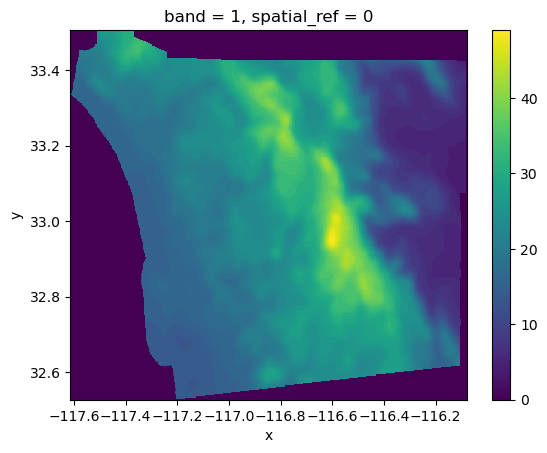

In [29]:
d.plot()

(array([44849., 17108., 10090., 29702., 31657., 23051., 11786.,  6411.,
         2011.,   407.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

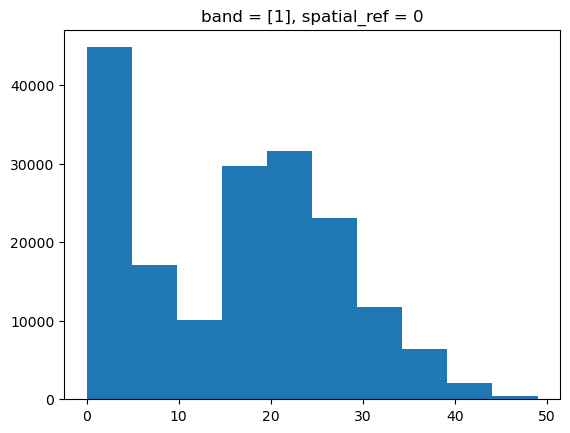

In [30]:
d.plot.hist()

In [31]:
type(d)

xarray.core.dataarray.DataArray

In [32]:
import rasterstats

In [33]:
gdf.head()

,TFID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,BLOCKCE20,SUFFIX1CE,ZCTA5CE20,UACE20,PUMACE20,...,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON,geometry
0,216102682,06,073,016302,2,2010,None,92021,78661,07313,...,None,None,None,None,L,N,22408,+32.8008387,-116.9453919,"POLYGON ((-116.94621 32.80044, -116.94621 32.8..."
1,216102683,06,073,016302,2,2006,None,92021,78661,07313,...,None,None,None,None,L,N,29220,+32.8008392,-116.9472819,"POLYGON ((-116.94836 32.80045, -116.94836 32.8..."
2,216102684,06,073,016302,2,2007,None,92021,78661,07313,...,None,None,None,None,L,N,18605,+32.8012731,-116.9487743,"POLYGON ((-116.94919 32.80063, -116.94919 32.8..."
3,226900092,06,073,016301,2,2003,None,92020,78661,07313,...,None,None,None,None,L,N,19567,+32.7999949,-116.9608656,"POLYGON ((-116.96140 32.80088, -116.96073 32.8..."
4,263464856,06,073,016301,2,2001,None,92020,78661,07313,...,None,None,None,None,L,N,23766,+32.8019391,-116.9605314,"POLYGON ((-116.96149 32.80194, -116.96141 32.8..."


In [34]:
tracts = gdf.dissolve(by='TRACTCE20')

In [35]:
tracts.shape

(737, 45)

<Axes: >

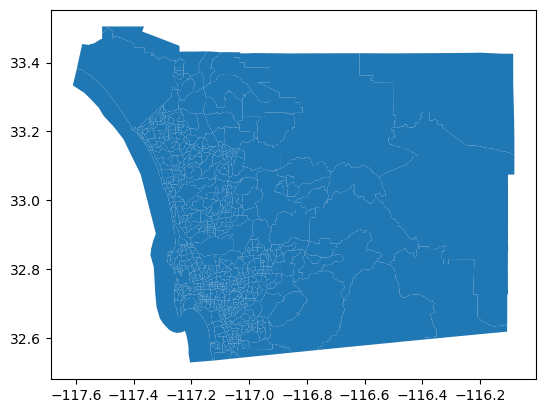

In [36]:
tracts.plot()

## Surface to Polygon Interpolation

### Spatial Join on Centroid

In [37]:
cents = tracts.centroid

In [38]:
coord_list = [(x, y) for x, y in zip(cents.x, cents.y)]
tracts['centest'] = [x[0] for x in clipped.sample(coord_list)]
tracts.head()

,geometry,TFID,STATEFP20,COUNTYFP20,BLKGRPCE20,BLOCKCE20,SUFFIX1CE,ZCTA5CE20,UACE20,PUMACE20,...,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON,centest
TRACTCE20,,,,,,,,,,,,,,,,,,,,,
000100,"POLYGON ((-117.18981 32.74761, -117.19013 32.7...",265709739,06,073,2,2007,None,92103,78661,07316,...,None,None,None,None,L,N,112711,+32.7537001,-117.1899099,15
000201,"POLYGON ((-117.17483 32.74987, -117.17501 32.7...",216103299,06,073,2,2005,None,92103,78661,07316,...,None,None,None,None,L,N,11341,+32.7553182,-117.1727763,15
000202,"POLYGON ((-117.17887 32.74009, -117.17917 32.7...",216103238,06,073,1,1009,None,92103,78661,07316,...,None,None,None,None,L,N,13631,+32.7428449,-117.1753608,15
000301,"POLYGON ((-117.16418 32.74077, -117.16471 32.7...",216103144,06,073,3,3003,None,92103,78661,07316,...,None,None,None,None,L,N,6373,+32.7411142,-117.1644494,15
000302,"POLYGON ((-117.16382 32.74146, -117.16382 32.7...",216103151,06,073,2,2005,None,92103,78661,07316,...,None,None,None,None,L,N,6488,+32.7411150,-117.1635466,15


In [39]:
tracts['centroid'] = tracts.centroid
tracts.set_geometry('centroid', inplace=True)

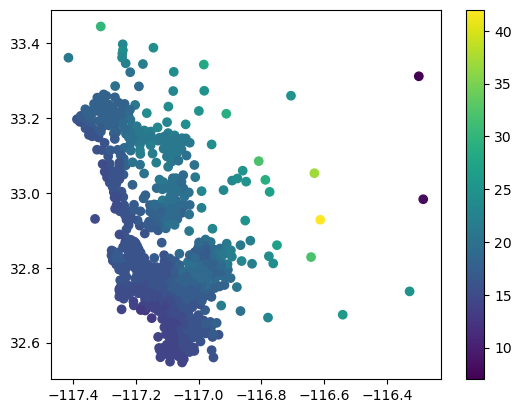

In [40]:
tracts.plot(column='centest', legend=True);

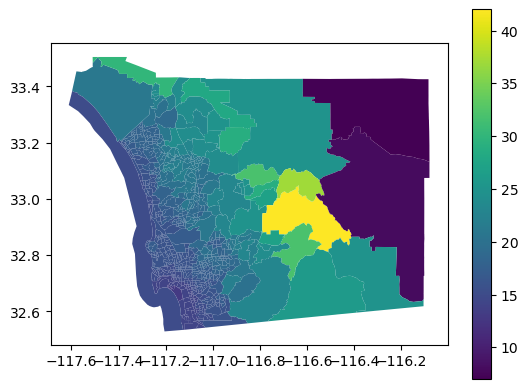

In [41]:
tracts.set_geometry('geometry', inplace=True)
tracts.plot(column='centest', legend=True);

## Zonal Methods of Surface to Area Interpolation

In [42]:
from rasterstats import zonal_stats
tstats = zonal_stats(tracts, "clipped_example.tif",
            stats="count min mean max median")

#elevations2 = zonal_stats(
#    sd_tracts.to_crs(dem.rio.crs),  # Geotable with zones
#    "../data/nasadem/nasadem_sd.tif",  # Path to surface file
#)
#elevations2 = pandas.DataFrame(elevations2)

In [43]:
tstats[:5]

[{'min': 15.0, 'max': 15.0, 'mean': 15.0, 'count': 17, 'median': 15.0},
 {'min': 15.0, 'max': 15.0, 'mean': 15.0, 'count': 11, 'median': 15.0},
 {'min': 15.0, 'max': 15.0, 'mean': 15.0, 'count': 14, 'median': 15.0},
 {'min': 15.0, 'max': 15.0, 'mean': 15.0, 'count': 4, 'median': 15.0},
 {'min': 15.0, 'max': 16.0, 'mean': 15.5, 'count': 8, 'median': 15.5}]

In [44]:
tstats = pd.DataFrame(tstats)

In [45]:
tstats.head()

,min,max,mean,count,median
0,15.0,15.0,15.0,17,15.0
1,15.0,15.0,15.0,11,15.0
2,15.0,15.0,15.0,14,15.0
3,15.0,15.0,15.0,4,15.0
4,15.0,16.0,15.5,8,15.5


In [46]:
tstats.shape

(737, 5)

In [47]:
tracts.shape

(737, 47)

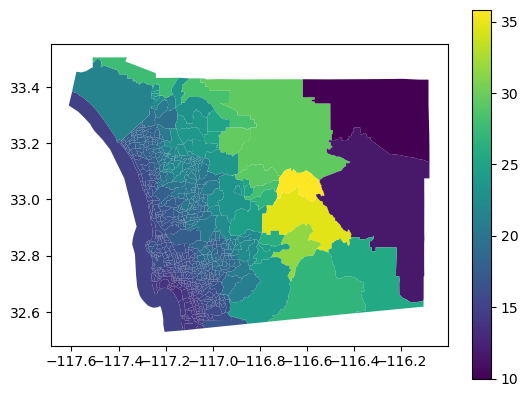

In [48]:
tracts['mean'] = tstats['mean'].values
tracts.plot(column='mean', legend=True);

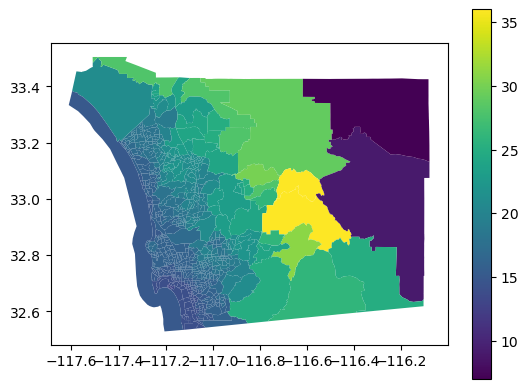

In [49]:
tracts['median'] = tstats['median'].values
tracts.plot(column='median', legend=True);

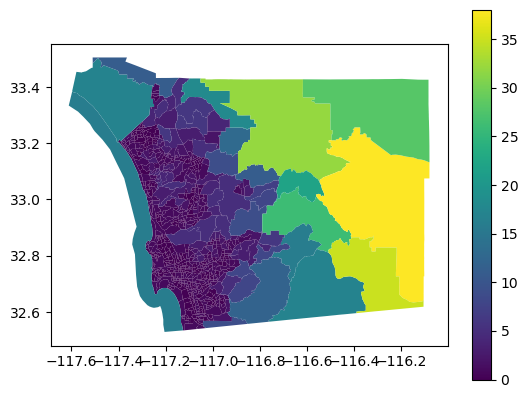

In [50]:
tracts['range'] = tstats['max'].values - tstats['min'].values
tracts.plot(column='range', legend=True);

In [51]:
import seaborn as sns

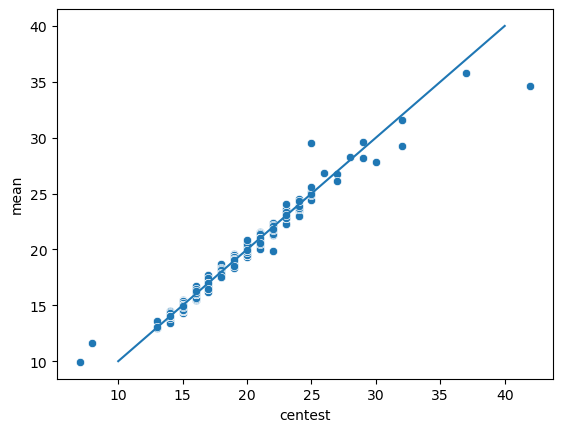

In [52]:
sns.scatterplot(data=tracts, x='centest', y='mean')
plt.plot([10, 40], [10, 40]);

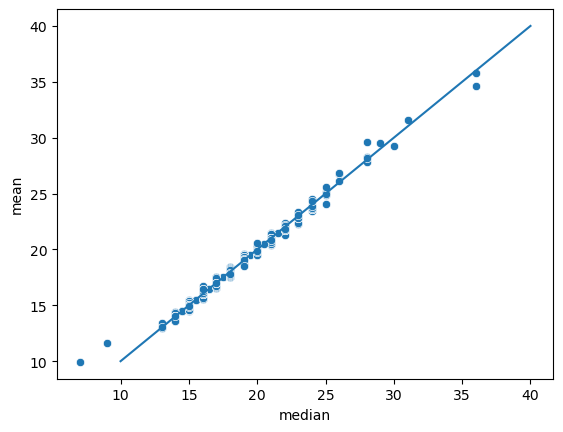

In [53]:
sns.scatterplot(data=tracts, x='median', y='mean')## 
plt.plot([10, 40], [10, 40]);